In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
start = '2015-01-01'
end = '2017-01-01'
united = get_pricing('UAL',start_date=start,end_date=end)
american = get_pricing('AAL',start_date=start,end_date=end)

In [9]:
united.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,67.740,68.08,65.71,66.380,5678309.0,66.380
2015-01-05 00:00:00+00:00,66.870,67.35,65.50,66.140,4263592.0,66.140
2015-01-06 00:00:00+00:00,66.630,67.00,63.11,64.599,5422328.0,64.599
2015-01-07 00:00:00+00:00,64.959,66.11,64.00,65.530,4230901.0,65.530
2015-01-08 00:00:00+00:00,65.700,67.52,65.41,66.540,5515839.0,66.540


In [10]:
american.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006
2015-01-07 00:00:00+00:00,52.340,52.605,51.104,51.967,9316925.0,51.967
2015-01-08 00:00:00+00:00,52.438,53.222,52.212,52.614,8802391.0,52.614


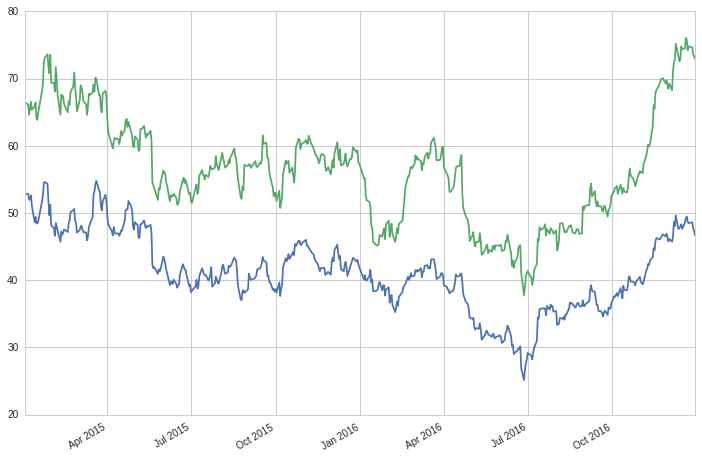

In [11]:
american['close_price'].plot(label='AA',figsize=(12,8))
united['close_price'].plot(label='United',figsize=(12,8))

In [12]:
np.corrcoef(american['close_price'],united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

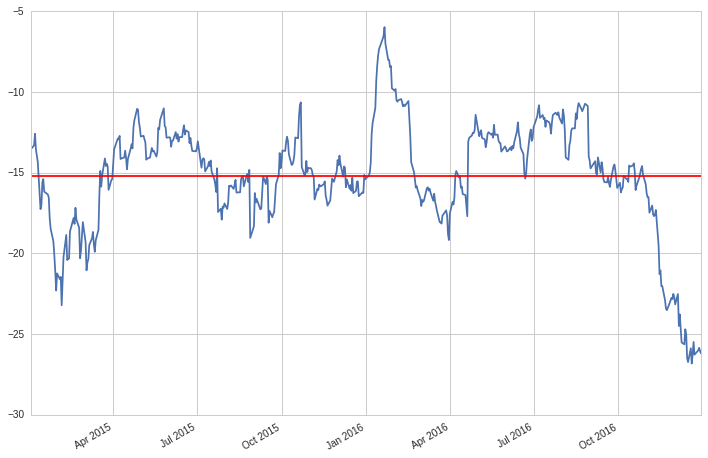

In [14]:
spread = american['close_price'] - united['close_price']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(), c='r')

In [15]:
def zscore(stocks):
    return (stocks-stocks.mean()) / np.std(stocks)

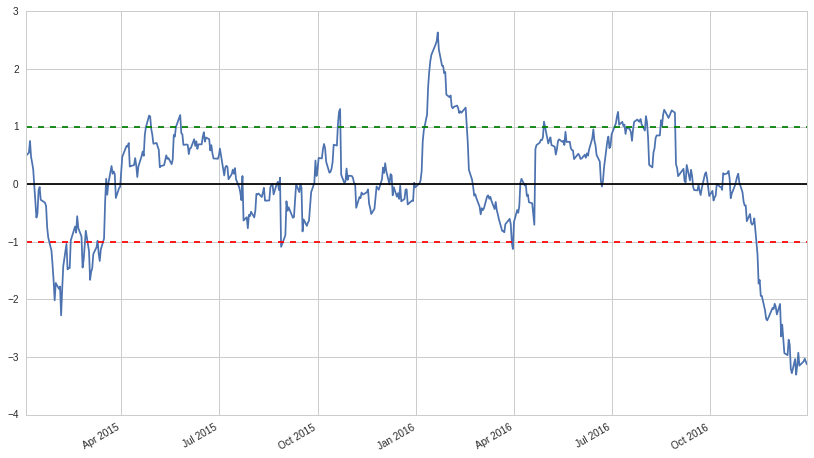

In [17]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),color='black')
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--')

In [18]:
spread_mavg1 = spread.rolling(1).mean()

spread_mavg30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()

zscore_30_1 = (spread_mavg1-spread_mavg30)/std_30

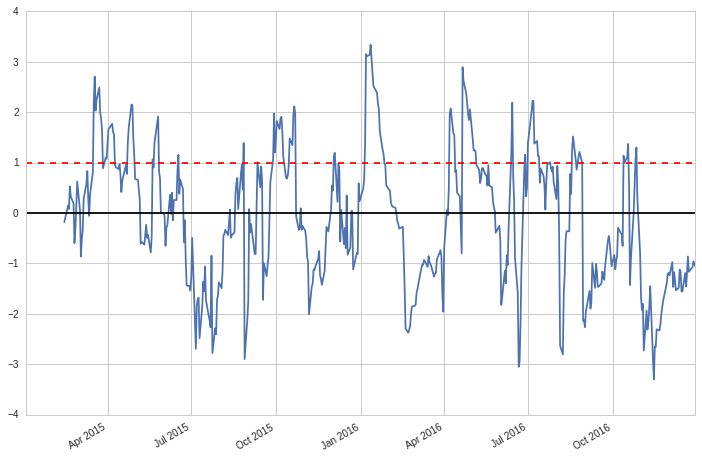

In [19]:
zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0,color='black')
plt.axhline(1.0,color='red',ls='--')